# In-class Practice 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic to make plots render without having to call plt.show()
%matplotlib inline

In [2]:
# The bottom of the files contains footnotes, which are not needed, so these are skipped.
gdp_df = pd.read_csv('data/gdp_percapita.csv', skiprows = range(6207,6210))

In [3]:
print(gdp_df.head(6))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2016  1802.695566              NaN
1     Afghanistan  2015  1809.016488              NaN
2     Afghanistan  2014  1838.960244              NaN
3     Afghanistan  2013  1848.700026              NaN
4     Afghanistan  2012  1839.273579              NaN
5     Afghanistan  2011  1660.739856              NaN


In [4]:
# Again, the bottom of the file contains unneeded footnotes, so are skipped.
internet_df = pd.read_csv('data/internet_use.csv', skiprows = range(4496, 4688))

In [5]:
print(internet_df.head(6))

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN


In [6]:
# The shapes of the dataframes
print('GDP Shape: %s' %(gdp_df.shape,))
print('Internet Use Shape: %s' %(internet_df.shape,))

GDP Shape: (6206, 4)
Internet Use Shape: (4495, 4)


In [7]:
# GDP Data Types
gdp_df.info()

# print(gdp_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 4 columns):
Country or Area    6206 non-null object
Year               6206 non-null int64
Value              6206 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 194.0+ KB


In [8]:
# Internet Data Types
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
Value Footnotes    948 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.5+ KB


In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6196,Zimbabwe,1999,2699.857521,NaN
6197,Zimbabwe,1998,2761.318537,NaN
6198,Zimbabwe,1997,2725.888701,NaN
6199,Zimbabwe,1996,2698.917300,NaN
6200,Zimbabwe,1995,2488.298028,NaN
6201,Zimbabwe,1994,2529.826671,NaN
6202,Zimbabwe,1993,2360.793284,NaN
6203,Zimbabwe,1992,2384.972026,NaN
6204,Zimbabwe,1991,2681.495089,NaN
6205,Zimbabwe,1990,2605.794944,NaN


In [10]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [11]:
# Drop the 'Value Footnotes' column
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [12]:
# Check that it was dropped
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 3 columns):
Country or Area    6206 non-null object
Year               6206 non-null int64
Value              6206 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 145.5+ KB


In [13]:
internet_df.drop('Value Footnotes', axis = 1, inplace=True)

In [14]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.4+ KB


In [15]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [16]:
# outer join to preserve all rows - this results in many NaN
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer')

In [17]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2016,1802.695566,NaN
1,Afghanistan,2015,1809.016488,NaN
2,Afghanistan,2014,1838.960244,6.390000
3,Afghanistan,2013,1848.700026,5.900000
4,Afghanistan,2012,1839.273579,5.454545


In [18]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7172,Virgin Islands (U.S.),1997,NaN,6.948369
7173,Virgin Islands (U.S.),1996,NaN,4.647186
7174,Virgin Islands (U.S.),1995,NaN,2.801958
7175,Virgin Islands (U.S.),1994,NaN,0.940645
7176,Virgin Islands (U.S.),1990,NaN,0.000000


In [19]:
# Can also use .query()

years = [2004, 2009, 2014]
gdp_int_selected = gdp_and_internet_use.loc[gdp_and_internet_use.Year.isin(years)]

In [20]:
gdp_int_selected.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2,Afghanistan,2014,1838.960244,6.390000
7,Afghanistan,2009,1531.173993,3.550000
12,Afghanistan,2004,1062.249360,0.105809
17,Albania,2014,10701.120786,60.100000
22,Albania,2009,9524.649303,41.200000


In [21]:
gdp_int_2004 = gdp_int_selected[gdp_int_selected.Year == 2004]
gdp_int_2009 = gdp_int_selected[gdp_int_selected.Year == 2009]
gdp_int_2014 = gdp_int_selected[gdp_int_selected.Year == 2014]

In [22]:
# Which country had the lowest percent of internet users in 2014? What was the percentage?

# Can use nlargest() method here

gdp_int_2014[gdp_int_2014.Internet_Users_Pct == gdp_int_2014.Internet_Users_Pct.max()][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
2332,Iceland,98.16


In [23]:
# Which country had the lowest percent of internet users in 2014? What was the percentage?
gdp_int_2014[gdp_int_2014.Internet_Users_Pct == gdp_int_2014.Internet_Users_Pct.min()][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
6443,Dem. People's Rep. of Korea,0.0


In [24]:
# Highest percent of internet users in 2009.
gdp_int_2009[gdp_int_2009.Internet_Users_Pct == gdp_int_2009.Internet_Users_Pct.max()][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
2337,Iceland,93.0


In [25]:
# Lowest percent of internet users in 2009.
gdp_int_2009[gdp_int_2009.Internet_Users_Pct == gdp_int_2009.Internet_Users_Pct.min()][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
6447,Dem. People's Rep. of Korea,0.0


In [26]:
# Highest percent of internet users in 2004.
gdp_int_2004[gdp_int_2004.Internet_Users_Pct == gdp_int_2004.Internet_Users_Pct.max()][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
5397,Sweden,83.89


In [27]:
# Lowest percent of internet users in 2004.
gdp_int_2004[gdp_int_2004.Internet_Users_Pct == gdp_int_2004.Internet_Users_Pct.min()][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
6452,Dem. People's Rep. of Korea,0.0


In [28]:
# Which country had the highest gdp per capita in 2014? What was the gdp per capita?
gdp_int_2014[gdp_int_2014.GDP_Per_Capita == gdp_int_2014.GDP_Per_Capita.max()][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
3319,"Macao SAR, China",130755.115537


In [29]:
# Which country had the lowest gdp per capita in 2014? What was the gdp per capita?
gdp_int_2014[gdp_int_2014.GDP_Per_Capita == gdp_int_2014.GDP_Per_Capita.min()][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
899,Central African Republic,601.785892


In [30]:
# Highest gdp per capita in 2009.
gdp_int_2009[gdp_int_2009.GDP_Per_Capita == gdp_int_2009.GDP_Per_Capita.max()][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
4595,Qatar,117064.859658


In [31]:
# Lowest gdp per capita in 2009.
gdp_int_2009[gdp_int_2009.GDP_Per_Capita == gdp_int_2009.GDP_Per_Capita.min()][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
1223,Dem. Rep. Congo,588.393411


In [32]:
# Highest gdp per capita in 2004.
gdp_int_2004[gdp_int_2004.GDP_Per_Capita == gdp_int_2004.GDP_Per_Capita.max()][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
4600,Qatar,116418.226457


In [33]:
# Lowest gdp per capita in 2004.
gdp_int_2004[gdp_int_2004.GDP_Per_Capita == gdp_int_2004.GDP_Per_Capita.min()][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
1228,Dem. Rep. Congo,533.536363


Create some scatterplots:
a. 2004 Percent Using the Internet vs gdp per capita
b. 2009 Percent Using the Internet vs gdp per capita
c. 2014 Percent Using the Internet vs gdp per capita

Text(0.5,0,'GDP Per Capita')

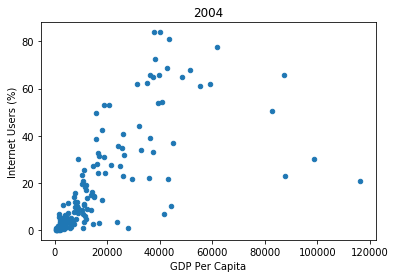

In [34]:
gdp_int_2004.plot(kind = 'scatter', y = 'Internet_Users_Pct', x = 'GDP_Per_Capita')
plt.title('2004')
plt.ylabel('Internet Users (%)')
plt.xlabel('GDP Per Capita')

Text(0.5,0,'GDP Per Capita')

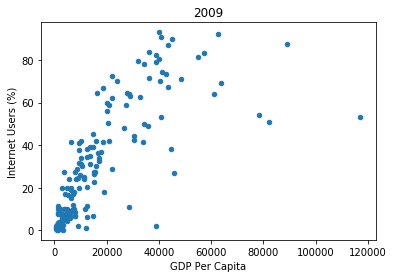

In [35]:
gdp_int_2009.plot(kind = 'scatter', y = 'Internet_Users_Pct', x = 'GDP_Per_Capita')
plt.title('2009')
plt.ylabel('Internet Users (%)')
plt.xlabel('GDP Per Capita')

Text(0.5,0,'GDP Per Capita')

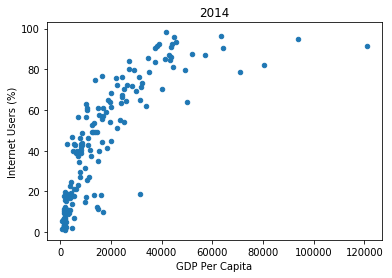

In [36]:
gdp_int_2014.plot(kind = 'scatter',y = 'Internet_Users_Pct', x = 'GDP_Per_Capita')
plt.title('2014')
plt.ylabel('Internet Users (%)')
plt.xlabel('GDP Per Capita')

Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

From the plots, it appears that there is a positive correlation between the percentage of internet users and a country's GDP per capita. This trend appears to be getting stronger from 2004 to 2014. In 2004, there were several countries wich high GDP Per Capita but low percentage of internet users. There is a very distinct group of three with this property. The data appears to be more closely grouped in 2014 versus the other years.

Text(0.5,1,'GDP Per Capita, 2014')

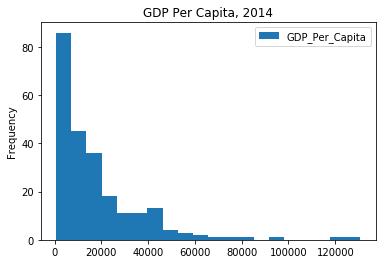

In [37]:
# Look at the distribution of gdp per capita values for 2014. Is it unimodal?
gdp_int_2014[['GDP_Per_Capita']].plot(kind='hist', bins=20)
plt.title("GDP Per Capita, 2014")

The distribution appears to be unimodal with a single peak on the left side.

Text(0.5,1,'Percentage of Internet Users, 2014')

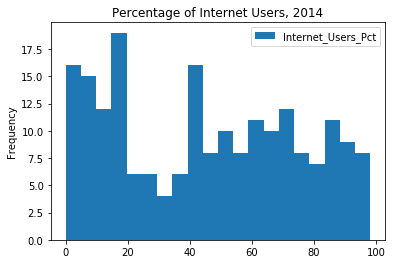

In [38]:
# Look at the distribution of Internet Use for 2014. Is it unimodal?
gdp_int_2014[['Internet_Users_Pct']].plot(kind='hist', bins=20)
plt.title("Percentage of Internet Users, 2014")

This distribution appears to have at least two distinct peaks, meaning that it is not unimodal.

In [39]:
# What are the top 5 countries in terms of internet use in 2014?
gdp_int_2014.sort_values('Internet_Users_Pct', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2332,Iceland,2014,41701.137092,98.16
6266,Bermuda,2014,NaN,96.80
4143,Norway,2014,63419.314779,96.30
1245,Denmark,2014,45057.074170,95.99
6209,Andorra,2014,NaN,95.90


The top 5 countries in terms of internet use in 2014 were Iceland, Bermuda, Norway, Denmark, and Andorra.

Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [40]:
top_5_internet = gdp_int_selected[gdp_int_selected.Country.isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])]


In [41]:
print(top_5_internet.shape)
top_5_internet

(15, 4)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
478,Bermuda,2009,57151.919132,83.250000
483,Bermuda,2004,55452.638880,60.990867
1245,Denmark,2014,45057.074170,95.990000
1250,Denmark,2009,43382.625459,86.840000
1255,Denmark,2004,43670.445300,80.930000
2332,Iceland,2014,41701.137092,98.160000
2337,Iceland,2009,40189.632828,93.000000
2342,Iceland,2004,37865.375808,83.880000
4143,Norway,2014,63419.314779,96.300000
4148,Norway,2009,62698.285355,92.080000


27. Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries. Which country had the greatest growth between 2004 and 2014? If you have time, try to figure out how to fix the plotting issue with Bermuda.

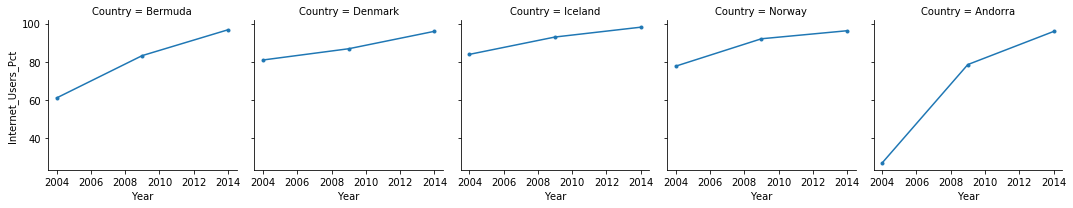

In [42]:
t5i = sns.FacetGrid(top_5_internet.sort_values('Year'), col='Country')
t5i = t5i.map(plt.plot, 'Year', 'Internet_Users_Pct', marker = '.')

All of the countries experienced growth in the percentage of internet users from 2004 to 2014. Out of these five countries, Andorra had the greatest growth from 2004 and 2014.

28. Repeat the steps above to look at the trend for 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?


In [43]:
gdp_int_2014.sort_values('Internet_Users_Pct').head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6443,Dem. People's Rep. of Korea,2014,NaN,0.00
6482,Eritrea,2014,NaN,0.99
5576,Timor-Leste,2014,1887.666113,1.14
712,Burundi,2014,803.172837,1.38
7014,Somalia,2014,NaN,1.63


In [44]:
bottom_5_internet = gdp_int_selected[gdp_int_selected.Country.isin(['Dem. People\'s Rep. of Korea', 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia'])]

In [45]:
print(bottom_5_internet.shape)
bottom_5_internet

(15, 4)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
712,Burundi,2014,803.172837,1.380000
717,Burundi,2009,760.061723,0.900000
722,Burundi,2004,741.766252,0.349060
1568,Eritrea,2009,1411.841397,0.540000
1573,Eritrea,2004,1633.415639,NaN
5576,Timor-Leste,2014,1887.666113,1.140000
5581,Timor-Leste,2009,1570.653184,0.185252
5586,Timor-Leste,2004,1193.889785,NaN
6443,Dem. People's Rep. of Korea,2014,NaN,0.000000
6447,Dem. People's Rep. of Korea,2009,NaN,0.000000


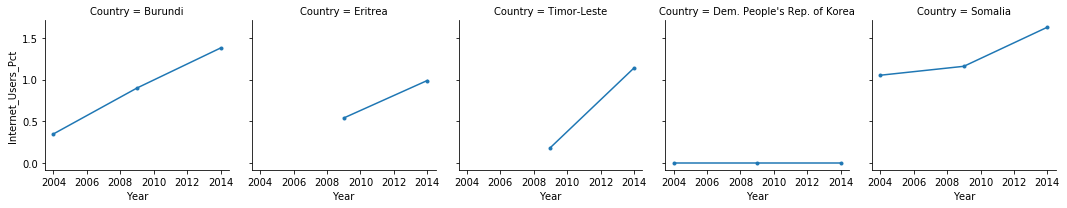

In [46]:
b5i = sns.FacetGrid(bottom_5_internet, col='Country')
b5i = b5i.map(plt.plot, 'Year', 'Internet_Users_Pct', marker='.')

With a constant 0% internet users, the Democratic People's Republic of Korea has consistently been at the bottom in terms of percentage of internet users.

29.     Get the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita. Use a seaborn facet grid for this.


In [47]:
gdp_int_2014.sort_values('GDP_Per_Capita', ascending=False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3319,"Macao SAR, China",2014,130755.115537,NaN
4590,Qatar,2014,120860.067558,91.49
3292,Luxembourg,2014,93655.334163,94.67
4882,Singapore,2014,80305.449884,82.00
631,Brunei,2014,76089.286574,NaN


In [48]:
top_5_gdp_countries = list(gdp_int_2014.sort_values('GDP_Per_Capita', ascending=False).head()['Country'])
top_5_gdp = gdp_int_selected.loc[gdp_int_selected.Country.isin(top_5_gdp_countries)]

In [49]:
print(top_5_gdp.shape)
top_5_gdp

(15, 4)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
631,Brunei,2014,76089.286574,NaN
636,Brunei,2009,79512.755013,NaN
641,Brunei,2004,83942.219407,NaN
3292,Luxembourg,2014,93655.334163,94.670000
3297,Luxembourg,2009,89098.734244,87.310000
3302,Luxembourg,2004,87209.819398,65.880000
3319,"Macao SAR, China",2014,130755.115537,NaN
3324,"Macao SAR, China",2009,80121.346661,NaN
3329,"Macao SAR, China",2004,60810.475400,NaN
4590,Qatar,2014,120860.067558,91.490000


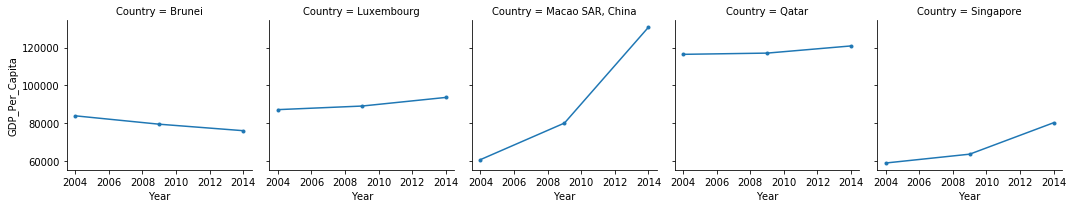

In [50]:
t5g = sns.FacetGrid(top_5_gdp, col='Country')
t5g = t5g.map(plt.plot, 'Year', 'GDP_Per_Capita', marker = '.')

From the facet grid, we see that Macao SAR, China had the fastest growth in GDP per capita out of these five countries, and recently surpassed Qatar for highest GDP per capita.

Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [51]:
gdp_int_2014.sort_values('GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
899,Central African Republic,2014,601.785892,NaN
1218,Dem. Rep. Congo,2014,725.107860,NaN
712,Burundi,2014,803.172837,1.38
3149,Liberia,2014,804.719887,5.41
4062,Niger,2014,904.163981,1.95


In [52]:
bottom_5_gdp_countries = list(gdp_int_2014.sort_values('GDP_Per_Capita').head().Country)

In [53]:
bottom_5_gdp = gdp_int_selected[gdp_int_selected.Country.isin(bottom_5_gdp_countries)]

In [54]:
print(bottom_5_gdp.shape)
bottom_5_gdp

(15, 4)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
712,Burundi,2014,803.172837,1.380000
717,Burundi,2009,760.061723,0.900000
722,Burundi,2004,741.766252,0.349060
899,Central African Republic,2014,601.785892,NaN
904,Central African Republic,2009,870.419763,NaN
909,Central African Republic,2004,823.535091,NaN
1218,Dem. Rep. Congo,2014,725.107860,NaN
1223,Dem. Rep. Congo,2009,588.393411,NaN
1228,Dem. Rep. Congo,2004,533.536363,NaN
3149,Liberia,2014,804.719887,5.410000


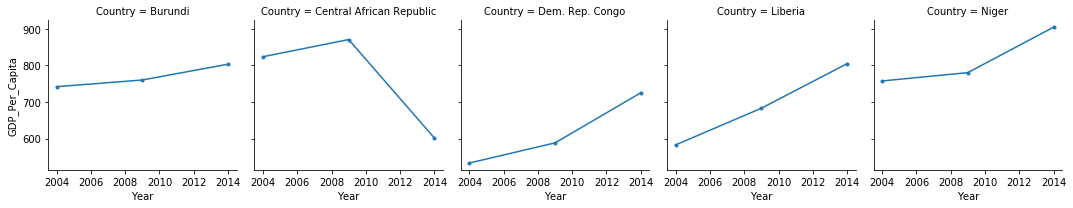

In [55]:
b5g = sns.FacetGrid(bottom_5_gdp, col='Country')
b5g = b5g.map(plt.plot, 'Year', 'GDP_Per_Capita', marker='.')

30.     Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

The Central African Republic had a steep drop in GDP from 2010 to 2014. A quick Google search reveals that there was a civil war in the Central African Republic going on since 2004, and this led to massive population displacement in 2013 and 2014.

At the other end of the spectrum, Macao has a rapidly growing GDP per capita. Wikipedia attributes this growth to the 1999 transfer of sovereignty of Macao from the Portugese Republic to the People's Republic of China and subsequent easing of travel restrictions and liberalization of its gambling industry.

# In-class Practice 2

In [56]:
from scipy import stats

In [57]:
print(stats.__doc__)


Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
   dweibull          -- Doubl

In [58]:
sigma=15
mu = 100
iq_scores = np.random.normal(mu,sigma,500)

Text(0.5,1,'Distribution of IQ Scores')

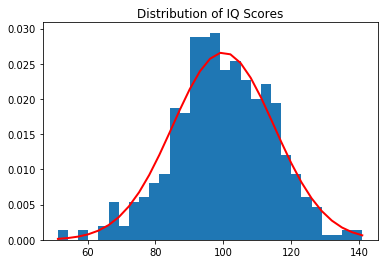

In [59]:
count, bins, ignored = plt.hist(iq_scores, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.title('Distribution of IQ Scores')

These scores look like could have been sampled from a normal distribution with the correct mean and standard deviation. Taking a larger sample would probably result in a distribution which looks closer to a normal distribution.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb5bc00a080>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5bc00a940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb5bc001ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb5bc0131d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb5bc0135f8>],
 'means': []}

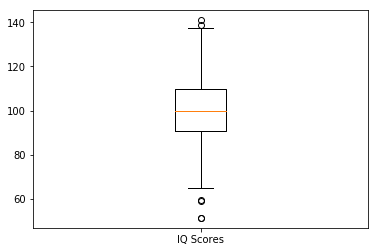

In [60]:
plt.boxplot(iq_scores, labels=['IQ Scores'])

## Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

## Look through the bokeh gallery (https://bokeh.pydata.org/en/latest/docs/gallery.html#gallery) and if time allows create a bokeh visualization using the UN data.

In [61]:
continents_df = pd.read_csv('data/Countries_Continents.csv')

In [62]:
gdp_int_cont = pd.merge(gdp_int_selected, continents_df, how='outer')
gdp_int_cont.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Continent
0,Afghanistan,2014.0,1838.960244,6.390000,Asia
1,Afghanistan,2009.0,1531.173993,3.550000,Asia
2,Afghanistan,2004.0,1062.249360,0.105809,Asia
3,Albania,2014.0,10701.120786,60.100000,Europe
4,Albania,2009.0,9524.649303,41.200000,Europe


In [63]:
gdp_int_cont.loc[gdp_int_cont.Country.isin(['Macao SAR, China', 'Hong Kong, China',
                                           'Macao, China', 'Hong Kong SAR, China']),'Continent'] = 'Asia'

In [64]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
from bokeh.models import HoverTool, Select, ColumnDataSource, CategoricalColorMapper, CheckboxGroup
from bokeh.layouts import row, column, widgetbox
from bokeh.palettes import Set1, RdBu3
output_notebook()

Loading BokehJS ...

In [65]:
'''def modify_doc(doc):
    source = ColumnDataSource(gdp_int_cont_2004)
    df = gdp_int_cont_2004
    
    continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
    mask = df.Continent.isin(continents)
    
    x_max = gdp_int_selected.GDP_Per_Capita.max()
    
    plot = figure(x_axis_label = "GDP Per Capita", y_axis_label = "Internet Users (%)", x_range = (0, x_max), y_range = (0,100) )
       
    hover = HoverTool(tooltips=[
    ('Country', '@Country'),
    ('GDP Per Capita', '@GDP_Per_Capita'),
    ('Internet Users', '@Internet_Users_Pct')
    ])
    plot.add_tools(hover)
    
    menu = Select(options = ['2004', '2009', '2014'], value = '2004', title = 'Year')
    
    mapper = CategoricalColorMapper(factors=continents, palette = Set1[6])
    
    checkbox_group = CheckboxGroup(
        labels=continents, active=list(range(0, 6)))
  
    plot.circle('GDP_Per_Capita', 'Internet_Users_Pct', source = source,
                color = {'field': 'Continent', 'transform': mapper}, legend = 'Continent', alpha = 0.8)
    
    plot.legend.location = 'bottom_right'

    def callback(attr, old, new):
        nonlocal df
        if menu.value == '2004': df = gdp_int_cont_2004
        elif menu.value == '2009': df = gdp_int_cont_2009
        else: df = gdp_int_cont_2014
        mask = df.Continent.isin([continents[i] for i in checkbox_group.active])
        source.data = ColumnDataSource(df[mask]).data
        #plot.title.text = menu.value    
    
    menu.on_change('value', callback)
    
    #def callback_check(attr, old, new):
    #    mask = df.Continent.isin([continents[i] for i in checkbox_group.active])
    #    source.data = ColumnDataSource(df[mask]).data
    
    checkbox_group.on_change('active', callback)

    doc.add_root(row(column(widgetbox(menu), checkbox_group), plot))
'''

'def modify_doc(doc):\n    source = ColumnDataSource(gdp_int_cont_2004)\n    df = gdp_int_cont_2004\n    \n    continents = [\'Asia\', \'Europe\', \'Africa\', \'North America\', \'South America\', \'Oceania\']\n    mask = df.Continent.isin(continents)\n    \n    x_max = gdp_int_selected.GDP_Per_Capita.max()\n    \n    plot = figure(x_axis_label = "GDP Per Capita", y_axis_label = "Internet Users (%)", x_range = (0, x_max), y_range = (0,100) )\n       \n    hover = HoverTool(tooltips=[\n    (\'Country\', \'@Country\'),\n    (\'GDP Per Capita\', \'@GDP_Per_Capita\'),\n    (\'Internet Users\', \'@Internet_Users_Pct\')\n    ])\n    plot.add_tools(hover)\n    \n    menu = Select(options = [\'2004\', \'2009\', \'2014\'], value = \'2004\', title = \'Year\')\n    \n    mapper = CategoricalColorMapper(factors=continents, palette = Set1[6])\n    \n    checkbox_group = CheckboxGroup(\n        labels=continents, active=list(range(0, 6)))\n  \n    plot.circle(\'GDP_Per_Capita\', \'Internet_Users_Pct

In [66]:
#show(modify_doc)

In [67]:
# Add data on imports and exports
trade = pd.read_csv('data/Trade.csv')

In [68]:
trade.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2016,ALL COMMODITIES,Import,6.534140e+09,NaN,No Quantity,NaN
1,Afghanistan,2016,ALL COMMODITIES,Export,5.964553e+08,NaN,No Quantity,NaN
2,Afghanistan,2015,ALL COMMODITIES,Import,7.722865e+09,NaN,No Quantity,NaN
3,Afghanistan,2015,ALL COMMODITIES,Export,5.714050e+08,NaN,No Quantity,NaN
4,Afghanistan,2014,ALL COMMODITIES,Import,7.697178e+09,NaN,No Quantity,NaN


In [69]:
trade_df = trade.pivot_table(index = ['Country or Area', 'Year'], columns = 'Flow', values = 'Trade (USD)').reset_index()
trade_df.columns.name = None
trade_df.drop(['Re-Export', 'Re-Import'], axis = 1, inplace = True)
trade_df.rename(columns={'Country or Area': 'Country'}, inplace=True)
trade_df.head()

,Country,Year,Export,Import
0,Afghanistan,2008,540065594.0,3.019860e+09
1,Afghanistan,2009,403441006.0,3.336435e+09
2,Afghanistan,2010,388483635.0,5.154250e+09
3,Afghanistan,2011,375850935.0,6.390311e+09
4,Afghanistan,2012,428902710.0,6.204984e+09


In [70]:
trade_df_selected = trade_df[trade_df.Year.isin([2004, 2009, 2014])]

In [71]:
data = pd.merge(gdp_int_cont, trade_df_selected, how = 'outer')
data.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Continent,Export,Import
0,Afghanistan,2014.0,1838.960244,6.390000,Asia,5.705340e+08,7.697178e+09
1,Afghanistan,2009.0,1531.173993,3.550000,Asia,4.034410e+08,3.336435e+09
2,Afghanistan,2004.0,1062.249360,0.105809,Asia,NaN,NaN
3,Albania,2014.0,10701.120786,60.100000,Europe,2.430724e+09,5.229972e+09
4,Albania,2009.0,9524.649303,41.200000,Europe,1.087915e+09,4.548288e+09


In [72]:
# Normalize trade data (make it per capita)
pop = pd.read_csv('data/Population.csv')

In [73]:
pop.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 62'], axis =1, inplace = True)

In [74]:
pop = pop.melt(id_vars = 'Country Name', var_name = 'Year', value_name = 'Population').sort_values(['Country Name', 'Year'])
pop.rename(columns = {'Country Name': 'Country'}, inplace = True)

In [75]:
pop.Year = pop.Year.apply(pd.to_numeric)

In [76]:
pop_selected = pop[pop.Year.isin([2004, 2009, 2014])]

In [77]:
data = pd.merge(data, pop_selected, how = 'outer')

In [78]:
data.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Continent,Export,Import,Population
0,Afghanistan,2014.0,1838.960244,6.390000,Asia,5.705340e+08,7.697178e+09,32758020.0
1,Afghanistan,2009.0,1531.173993,3.550000,Asia,4.034410e+08,3.336435e+09,28004331.0
2,Afghanistan,2004.0,1062.249360,0.105809,Asia,NaN,NaN,24118979.0
3,Albania,2014.0,10701.120786,60.100000,Europe,2.430724e+09,5.229972e+09,2889104.0
4,Albania,2009.0,9524.649303,41.200000,Europe,1.087915e+09,4.548288e+09,2927519.0


In [79]:
data["Exports_Per_Capita"] = data.Export/data.Population
data["Imports_Per_Capita"] = data.Import/data.Population

In [80]:
data.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Continent,Export,Import,Population,Exports_Per_Capita,Imports_Per_Capita
0,Afghanistan,2014.0,1838.960244,6.390000,Asia,5.705340e+08,7.697178e+09,32758020.0,17.416621,234.970800
1,Afghanistan,2009.0,1531.173993,3.550000,Asia,4.034410e+08,3.336435e+09,28004331.0,14.406379,119.139957
2,Afghanistan,2004.0,1062.249360,0.105809,Asia,NaN,NaN,24118979.0,NaN,NaN
3,Albania,2014.0,10701.120786,60.100000,Europe,2.430724e+09,5.229972e+09,2889104.0,841.341691,1810.240212
4,Albania,2009.0,9524.649303,41.200000,Europe,1.087915e+09,4.548288e+09,2927519.0,371.616684,1553.632231


In [81]:
literacy = pd.read_csv('data/Youth_Literacy.csv')
literacy.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Angola,2014,Female,15-24 year olds,Percent,66.98237
1,Angola,2014,Male,15-24 year olds,Percent,78.98879
2,Angola,2014,All genders,15-24 year olds,Percent,72.95314
3,Argentina,2014,Male,15-24 year olds,Percent,99.10730
4,Argentina,2014,Female,15-24 year olds,Percent,99.46383


In [82]:
literacy = literacy[literacy.Sex == "All genders"]
literacy.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
2,Angola,2014,All genders,15-24 year olds,Percent,72.95314
5,Argentina,2014,All genders,15-24 year olds,Percent,99.28286
8,Azerbaijan,2014,All genders,15-24 year olds,Percent,99.95699
11,Azerbaijan,2009,All genders,15-24 year olds,Percent,99.95130
12,Bangladesh,2014,All genders,15-24 year olds,Percent,82.16696


In [83]:
literacy.drop(['Sex', 'Age group', 'Units of measurement'], axis = 1, inplace=True)
literacy.head()

,Reference Area,Time Period,Observation Value
2,Angola,2014,72.95314
5,Argentina,2014,99.28286
8,Azerbaijan,2014,99.95699
11,Azerbaijan,2009,99.95130
12,Bangladesh,2014,82.16696


In [84]:
literacy.rename(columns = {'Reference Area': 'Country', 'Time Period': 'Year', 'Observation Value': 'Literacy'}, inplace = True)
literacy.head()

,Country,Year,Literacy
2,Angola,2014,72.95314
5,Argentina,2014,99.28286
8,Azerbaijan,2014,99.95699
11,Azerbaijan,2009,99.95130
12,Bangladesh,2014,82.16696


In [85]:
data = pd.merge(data, literacy, how = 'outer')

In [86]:
def modify_doc(doc):
    source = ColumnDataSource(data = {
        'x': data[data.Year == 2004].GDP_Per_Capita,
        'y': data[data.Year == 2004].Internet_Users_Pct,
        'Country' : data[data.Year == 2004].Country,
        'Continent' : data[data.Year == 2004].Continent
    })
    
    xmin,xmax = 0, max(data.GDP_Per_Capita)
    
    ymin,ymax = 0, 100
      
    #df = data[data.Year == 2004]
    
    continents = ['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
    #mask = df.Continent.isin(continents)
    
    #x_max = gdp_int_selected.GDP_Per_Capita.max()
    
    plot = figure(x_axis_label = "GDP Per Capita", y_axis_label = "Internet Users (%)", x_range = (xmin, xmax), y_range = (ymin, ymax) )
       
    hover = HoverTool(tooltips=[
    ('Country', '@Country')#,
    #('GDP Per Capita', '@GDP_Per_Capita'),
    #('Internet Users', '@Internet_Users_Pct')
    ])
    plot.add_tools(hover)
    
    menu = Select(options = ['2004', '2009', '2014'], value = '2004', title = 'Year')
    
    mapper = CategoricalColorMapper(factors=continents, palette = Set1[6])
    
    checkbox_group = CheckboxGroup(
        labels=continents, active=list(range(0, 6)))
    
    x_menu = Select(options = ['GDP Per Capita', 'Internet Users (%)', 'Exports Per Capita', 'Imports Per Capita', 'Youth Literacy (%)'],
                   value = 'GDP Per Capita', title = 'x-Axis')
    
    y_menu = Select(options = ['GDP Per Capita', 'Internet Users (%)', 'Exports Per Capita', 'Imports Per Capita', 'Youth Literacy (%)'],
                   value = 'Internet Users (%)', title = 'y-Axis')
    
    options = {'GDP Per Capita': 'GDP_Per_Capita', 
               'Internet Users (%)': 'Internet_Users_Pct', 
               'Exports Per Capita': 'Exports_Per_Capita', 
               'Imports Per Capita': 'Imports_Per_Capita',
            'Youth Literacy (%)': 'Literacy'}
  
    plot.circle('x', 'y', source = source,
                color = {'field': 'Continent', 'transform': mapper}, legend = 'Continent', alpha = 0.8)
    
    plot.legend.location = 'bottom_right'

    def callback(attr, old, new):
        yr = int(menu.value)
        #nonlocal df
        #df = data[data.Year == int(menu.value)]
        #if menu.value == '2004': df = gdp_int_cont_2004
        #elif menu.value == '2009': df = gdp_int_cont_2009
        #else: df = gdp_int_cont_2014
        mask = (data.Continent.isin([continents[i] for i in checkbox_group.active])) & (data.Year == yr)
        #source.data = ColumnDataSource(df[mask]).data
        plot.xaxis.axis_label = x_menu.value
        plot.yaxis.axis_label = y_menu.value
        
        new_data = {
        'x'       : data[mask][options[x_menu.value]],
        'y'       : data[mask][options[y_menu.value]],
        'Country' : data[mask].Country,
        'Continent'     : data[mask].Continent
        }
        source.data = new_data
        
        if x_menu.value == 'GDP Per Capita': xmin,xmax = 0, max(data.GDP_Per_Capita)
        elif x_menu.value in ['Internet Users (%)','Youth Literacy (%)'] : xmin, xmax = 0, 100
        else: xmin, xmax = min(data[options[x_menu.value]]), max(data[options[x_menu.value]])

        if y_menu.value == 'GDP Per Capita': ymin,ymax = 0, max(data.GDP_Per_Capita)
        elif y_menu.value in ['Internet Users (%)','Youth Literacy (%)']: ymin, ymax = 0, 100
        else: ymin, ymax = min(data[options[y_menu.value]]), max(data[options[y_menu.value]])
        
        
        plot.x_range.start = xmin
        plot.x_range.end = xmax
        plot.y_range.start = ymin
        plot.y_range.end = ymax
        
        #plot.title.text = menu.value    
    
    menu.on_change('value', callback)
    
    checkbox_group.on_change('active', callback)
    
    x_menu.on_change('value', callback)
    
    y_menu.on_change('value', callback)

    doc.add_root(row(widgetbox(menu, checkbox_group, x_menu, y_menu), plot))

In [87]:
show(modify_doc)